# bureau.csv
+ All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
+ For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

# bureau_balance.csv
+ Monthly balances of previous credits in Credit Bureau.
+ This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample # of relative previous credits # of months where we have some history observable for the previous credits) rows.

In [1]:
import numpy as np
import pandas as pd
import os
print(os.listdir("."))
import seaborn as sns
import matplotlib.pyplot as plt
import gc
from matplotlib_venn import venn2, venn3

['__notebook_source__.ipynb', '.ipynb_checkpoints']


In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
plt.style.use('fivethirtyeight')

In [4]:
bureau_balance = reduce_mem_usage(pd.read_csv('../input/bureau_balance.csv'))
bureau = reduce_mem_usage(pd.read_csv('../input/bureau.csv'))

Memory usage of dataframe is 624.85 MB
Memory usage after optimization is: 338.46 MB
Decreased by 45.8%
Memory usage of dataframe is 222.62 MB
Memory usage after optimization is: 119.49 MB
Decreased by 46.3%


In [5]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                int32
SK_ID_BUREAU              int32
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT               int16
CREDIT_DAY_OVERDUE        int16
DAYS_CREDIT_ENDDATE       float32
DAYS_ENDDATE_FACT         float32
AMT_CREDIT_MAX_OVERDUE    float32
CNT_CREDIT_PROLONG        int8
AMT_CREDIT_SUM            float32
AMT_CREDIT_SUM_DEBT       float32
AMT_CREDIT_SUM_LIMIT      float32
AMT_CREDIT_SUM_OVERDUE    float32
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE        int32
AMT_ANNUITY               float32
dtypes: float32(8), int16(2), int32(3), int8(1), object(3)
memory usage: 119.5+ MB


In [6]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
SK_ID_BUREAU      int32
MONTHS_BALANCE    int8
STATUS            object
dtypes: int32(1), int8(1), object(1)
memory usage: 338.5+ MB


In [7]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [8]:
for col in bureau.drop(['SK_ID_CURR', 'SK_ID_BUREAU'],axis=1).columns:
    print(col,len(bureau[col].unique()),'\n')

CREDIT_ACTIVE 4 

CREDIT_CURRENCY 4 

DAYS_CREDIT 2923 

CREDIT_DAY_OVERDUE 942 

DAYS_CREDIT_ENDDATE 14097 

DAYS_ENDDATE_FACT 2918 

AMT_CREDIT_MAX_OVERDUE 68252 

CNT_CREDIT_PROLONG 10 

AMT_CREDIT_SUM 236689 

AMT_CREDIT_SUM_DEBT 226528 

AMT_CREDIT_SUM_LIMIT 51727 

AMT_CREDIT_SUM_OVERDUE 1616 

CREDIT_TYPE 15 

DAYS_CREDIT_UPDATE 2982 

AMT_ANNUITY 40322 



In [9]:
for col in bureau.drop(['SK_ID_CURR', 'SK_ID_BUREAU'],axis=1).columns:
    if len(bureau[col].unique()) <= 15:
        print(bureau[col].value_counts())

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64
currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: CREDIT_CURRENCY, dtype: int64
0    1707314
1       7620
2       1222
3        191
4         54
5         21
9          2
6          2
8          1
7          1
Name: CNT_CREDIT_PROLONG, dtype: int64
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                 

In [10]:
gc.collect()

275

# bureau_balance feature creation



## Ideas:
+ Group all of 1-5 as one value
+ Change dtype from float to int

In [11]:
bureau.shape

(1716428, 17)

In [12]:
bureau_balance_month_count = bureau_balance.groupby('SK_ID_BUREAU', as_index=False).size().reset_index(name = 'balance_month_count')

In [13]:
bureau = bureau.merge(bureau_balance_month_count, how='left', on='SK_ID_BUREAU')
bureau['balance_month_count'].fillna(0, inplace=True)
del bureau_balance_month_count

In [14]:
for status_val in bureau_balance['STATUS'].unique():
    bureau = bureau.merge(bureau_balance[bureau_balance['STATUS'] == status_val].groupby('SK_ID_BUREAU', as_index=False).size().reset_index(name = 'balance_status_'+str(status_val)), how='left', on='SK_ID_BUREAU')
    bureau['balance_status_'+str(status_val)].fillna(0, inplace=True)
gc.collect()

231

In [15]:
bureau = reduce_mem_usage(bureau)
bureau.info()

Memory usage of dataframe is 250.45 MB
Memory usage after optimization is: 191.52 MB
Decreased by 23.5%
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716428 entries, 0 to 1716427
Data columns (total 26 columns):
SK_ID_CURR                int32
SK_ID_BUREAU              int32
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT               int16
CREDIT_DAY_OVERDUE        int16
DAYS_CREDIT_ENDDATE       float32
DAYS_ENDDATE_FACT         float32
AMT_CREDIT_MAX_OVERDUE    float32
CNT_CREDIT_PROLONG        int8
AMT_CREDIT_SUM            float32
AMT_CREDIT_SUM_DEBT       float32
AMT_CREDIT_SUM_LIMIT      float32
AMT_CREDIT_SUM_OVERDUE    float32
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE        int32
AMT_ANNUITY               float32
balance_month_count       float32
balance_status_C          float32
balance_status_0          float32
balance_status_X          float32
balance_status_1          float32
balance_status_2          float32
balance_status_3 

In [16]:
bureau.shape

(1716428, 26)

In [17]:
gc.collect()

17

# bureau feature creation

## Ideas
+ NaN for XGBoost
+ Suspicious of low days_credit?
+ Categorical Normalization?

In [18]:
bureau = pd.get_dummies(bureau)

In [19]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,balance_month_count,balance_status_C,balance_status_0,balance_status_X,balance_status_1,balance_status_2,balance_status_3,balance_status_5,balance_status_4,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,-131,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,-20,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,-16,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,-16,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,-21,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


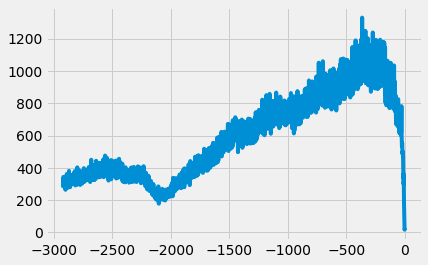

In [20]:
bureau['DAYS_CREDIT'].value_counts().sort_index(ascending = False).plot()

In [21]:
bureau_agg = bureau.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                                 CREDIT_DAY_OVERDUE                  DAYS_CREDIT_ENDDATE                                     DAYS_ENDDATE_FACT                                     AMT_CREDIT_MAX_OVERDUE                                            CNT_CREDIT_PROLONG                  AMT_CREDIT_SUM                                                      AMT_CREDIT_SUM_DEBT                                         AMT_CREDIT_SUM_LIMIT                                                   AMT_CREDIT_SUM_OVERDUE                     DAYS_CREDIT_UPDATE                              AMT_ANNUITY                                     balance_month_count                              balance_status_C                              balance_status_0                            balance_status_X                           balance_status_1                           balance_status_2                     balance_status_3                     balance_status_5                     balance_status_4                     CREDIT_ACTIVE_Active                       CREDIT_ACTIVE_Bad debt                  CREDIT_ACTIVE_Closed                       CREDIT_ACTIVE_Sold                  CREDIT_CURRENCY_currency 1                  CREDIT_CURRENCY_currency 2                  CREDIT_CURRENCY_currency 3                  CREDIT_CURRENCY_currency 4                  CREDIT_TYPE_Another type of loan                  CREDIT_TYPE_Car loan                  CREDIT_TYPE_Cash loan (non-earmarked)                  CREDIT_TYPE_Consumer credit                       CREDIT_TYPE_Credit card                       CREDIT_TYPE_Interbank credit                  CREDIT_TYPE_Loan for business development                  CREDIT_TYPE_Loan for purchase of shares (margin lending)                  CREDIT_TYPE_Loan for the purchase of equipment                  CREDIT_TYPE_Loan for working capital replenishment                  CREDIT_TYPE_Microloan                  CREDIT_TYPE_Mobile operator loan                  CREDIT_TYPE_Mortgage                  CREDIT_TYPE_Real estate loan                  CREDIT_TYPE_Unknown type of loan                 
                   count         mean  max   min     sum              count mean max min sum               count        mean     max     min     sum             count         mean    max     min     sum                  count         mean         max  min          sum              count mean max min sum          count           mean            max      min           sum               count           mean       max  min       sum                count           mean            max  min            sum                  count mean  max  min  sum              count        mean  max   min   sum       count         mean      max  min      sum               count       mean   max  min    sum            count       mean   max  min    sum            count      mean   max  min   sum            count      mean  max  min   sum            count      mean  max  min   sum            count mean  max  min  sum            count mean  max  min  sum            count mean  max  min  sum            count mean  max  min  sum                count      mean max min sum                  count mean max min sum                count      mean max min sum              count mean max min sum                      count mean max min sum                      count mean max min sum                      count mean max min sum                      count mean max min sum                            count mean max min sum                count mean max min sum                                 count mean max min sum                       count      mean max min sum                   count      mean max min sum                        count mean max min sum                                     count mean max min sum                                                    count mean max min sum                                          count mean max min sum                                        

In [22]:
columns = ['SK_ID_CURR']

# Iterate through the variables names
for var in bureau_agg.columns.levels[0]:
    # Skip the id name
    if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
        for stat in bureau_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('bureau_%s_%s' % (var, stat))

In [23]:
bureau_agg.columns = columns
bureau_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_sum,bureau_DAYS_CREDIT_ENDDATE_count,bureau_DAYS_CREDIT_ENDDATE_mean,bureau_DAYS_CREDIT_ENDDATE_max,bureau_DAYS_CREDIT_ENDDATE_min,bureau_DAYS_CREDIT_ENDDATE_sum,bureau_DAYS_ENDDATE_FACT_count,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_ENDDATE_FACT_max,bureau_DAYS_ENDDATE_FACT_min,bureau_DAYS_ENDDATE_FACT_sum,bureau_AMT_CREDIT_MAX_OVERDUE_count,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_max,bureau_AMT_CREDIT_MAX_OVERDUE_min,bureau_AMT_CREDIT_MAX_OVERDUE_sum,bureau_CNT_CREDIT_PROLONG_count,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_max,bureau_CNT_CREDIT_PROLONG_min,bureau_CNT_CREDIT_PROLONG_sum,bureau_AMT_CREDIT_SUM_count,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_max,bureau_AMT_CREDIT_SUM_min,bureau_AMT_CREDIT_SUM_sum,bureau_AMT_CREDIT_SUM_DEBT_count,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_DEBT_max,bureau_AMT_CREDIT_SUM_DEBT_min,bureau_AMT_CREDIT_SUM_DEBT_sum,bureau_AMT_CREDIT_SUM_LIMIT_count,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_AMT_CREDIT_SUM_LIMIT_max,bureau_AMT_CREDIT_SUM_LIMIT_min,bureau_AMT_CREDIT_SUM_LIMIT_sum,bureau_AMT_CREDIT_SUM_OVERDUE_count,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_max,bureau_AMT_CREDIT_SUM_OVERDUE_min,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum,bureau_balance_month_count_count,bureau_balance_month_count_mean,bureau_balance_month_count_max,bureau_balance_month_count_min,bureau_balance_month_count_sum,bureau_balance_status_C_count,bureau_balance_status_C_mean,bureau_balance_status_C_max,bureau_balance_status_C_min,bureau_balance_status_C_sum,bureau_balance_status_0_count,bureau_balance_status_0_mean,bureau_balance_status_0_max,bureau_balance_status_0_min,bureau_balance_status_0_sum,bureau_balance_status_X_count,bureau_balance_status_X_mean,bureau_balance_status_X_max,bureau_balance_status_X_min,bureau_balance_status_X_sum,bureau_balance_status_1_count,bureau_balance_status_1_mean,bureau_balance_status_1_max,bureau_balance_status_1_min,bureau_balance_status_1_sum,bureau_balance_status_2_count,bureau_balance_status_2_mean,bureau_balance_status_2_max,bureau_balance_status_2_min,bureau_balance_status_2_sum,bureau_balance_status_3_count,bureau_balance_status_3_mean,bureau_balance_status_3_max,bureau_balance_status_3_min,bureau_balance_status_3_sum,bureau_balance_status_5_count,bureau_balance_status_5_mean,bureau_balance_status_5_max,bureau_balance_status_5_min,bureau_balance_status_5_sum,bureau_balance_status_4_count,bureau_balance_status_4_mean,bureau_balance_status_4_max,bureau_balance_status_4_min,bureau_balance_status_4_sum,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_mean,bureau_CREDIT_ACTIVE_Active_max,bureau_CREDIT_ACTIVE_Active_min,bureau_CREDIT_ACTIVE_Active_sum,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_mean,bureau_CREDIT_ACTIVE_Bad debt_max,bureau_CREDIT_ACTIVE_Bad debt_min,bureau_CREDIT_ACTIVE_Bad debt_sum,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_mean,bureau_CREDIT_ACTIVE_Closed_max,bureau_CREDIT_ACTIVE_Closed_min,bureau_CREDIT_ACTIVE_Closed_sum,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_mean,bureau_CREDIT_ACTIVE_Sold_max,bureau_CREDIT_ACTIVE_Sold_min,bureau_CREDIT_ACTIVE_Sold_sum,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_mean,bureau_CREDIT_CURRENCY_currency 1_max,bureau_CREDIT_CURRENCY_currency 1_min,bureau_CREDIT_CURRENCY_currency 1_sum,bureau_CREDIT_CURRENCY_currency 2_count,

In [24]:
bureau_agg.to_csv('bureau.csv', index=False)

In [25]:
bb = reduce_mem_usage(pd.read_csv('../input/bureau_balance.csv'))
b = reduce_mem_usage(pd.read_csv('../input/bureau.csv'))

Memory usage of dataframe is 624.85 MB
Memory usage after optimization is: 338.46 MB
Decreased by 45.8%
Memory usage of dataframe is 222.62 MB
Memory usage after optimization is: 119.49 MB
Decreased by 46.3%


In [26]:
bb_cat = [col for col in bb.columns if bb[col].dtype == 'object']
bureau_cat = [col for col in b.columns if b[col].dtype == 'object']
print ('Number of categorical features in bureau is ',len(bureau_cat),'and in bb', len(bb_cat))
# Bureau balance: Perform aggregations and merge with bureau.csv
bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}

Number of categorical features in bureau is  3 and in bb 1


In [27]:
bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
bb_agg = bb_agg.reset_index()

In [28]:
bb_agg = bb_agg.merge(bb, how='left', on='SK_ID_BUREAU')
bb_agg.head()

,SK_ID_BUREAU,MONTHS_BALANCE_MIN,MONTHS_BALANCE_MAX,MONTHS_BALANCE_SIZE,MONTHS_BALANCE,STATUS
0,5001709,-96,0,97,0,C
1,5001709,-96,0,97,-1,C
2,5001709,-96,0,97,-2,C
3,5001709,-96,0,97,-3,C
4,5001709,-96,0,97,-4,C


In [29]:
bb_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27299925 entries, 0 to 27299924
Data columns (total 6 columns):
SK_ID_BUREAU           int64
MONTHS_BALANCE_MIN     int8
MONTHS_BALANCE_MAX     int8
MONTHS_BALANCE_SIZE    int64
MONTHS_BALANCE         int8
STATUS                 object
dtypes: int64(2), int8(3), object(1)
memory usage: 911.2+ MB


In [30]:
b.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [31]:
b = b.merge(bb_agg, how='left', on='SK_ID_BUREAU')
b.drop(['SK_ID_BUREAU'], axis=1, inplace= True)

In [32]:
b['STATUS'].value_counts()

C    11555429
0     7195282
X     5115090
1      229773
5       50334
2       20954
3        7833
4        5046
Name: STATUS, dtype: int64

In [33]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
SK_ID_BUREAU      int32
MONTHS_BALANCE    int8
STATUS            object
dtypes: int32(1), int8(1), object(1)
memory usage: 338.5+ MB


In [34]:
num_aggregations = {
        'DAYS_CREDIT': [ 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': [ 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': [ 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': [ 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }

In [35]:
bureau_agg = b.groupby('SK_ID_CURR').agg({**num_aggregations})
bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])

In [36]:
bureau_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305811 entries, 100001 to 456255
Data columns (total 20 columns):
BURO_DAYS_CREDIT_MEAN               305811 non-null float64
BURO_DAYS_CREDIT_VAR                281679 non-null float64
BURO_DAYS_CREDIT_ENDDATE_MEAN       303226 non-null float32
BURO_DAYS_CREDIT_UPDATE_MEAN        305811 non-null float64
BURO_CREDIT_DAY_OVERDUE_MEAN        305811 non-null float64
BURO_AMT_CREDIT_MAX_OVERDUE_MEAN    212971 non-null float32
BURO_AMT_CREDIT_SUM_MEAN            305809 non-null float32
BURO_AMT_CREDIT_SUM_SUM             305811 non-null float32
BURO_AMT_CREDIT_SUM_DEBT_MEAN       297439 non-null float32
BURO_AMT_CREDIT_SUM_DEBT_SUM        305811 non-null float32
BURO_AMT_CREDIT_SUM_OVERDUE_MEAN    305811 non-null float32
BURO_AMT_CREDIT_SUM_LIMIT_MEAN      280503 non-null float32
BURO_AMT_CREDIT_SUM_LIMIT_SUM       305811 non-null float32
BURO_AMT_ANNUITY_MAX                118224 non-null float32
BURO_AMT_ANNUITY_MEAN               118224 n